In [3]:
# import the required packages
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from matplotlib import rcParams
import os

from google.colab import drive
drive.mount('/content/drive')
# read the csv file from drive
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/zomato.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Fetch first five rows
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [5]:
# Cleaning Step 1: renaming columns
data = data.rename(columns = {'listed_in(type)':'food_type', 'listed_in(city)':'city','approx_cost(for two people)':'cost for two'})

In [6]:
# display columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   url           51717 non-null  object
 1   address       51717 non-null  object
 2   name          51717 non-null  object
 3   online_order  51717 non-null  object
 4   book_table    51717 non-null  object
 5   rate          43942 non-null  object
 6   votes         51717 non-null  int64 
 7   phone         50509 non-null  object
 8   location      51696 non-null  object
 9   rest_type     51490 non-null  object
 10  dish_liked    23639 non-null  object
 11  cuisines      51672 non-null  object
 12  cost for two  51371 non-null  object
 13  reviews_list  51717 non-null  object
 14  menu_item     51717 non-null  object
 15  food_type     51717 non-null  object
 16  city          51717 non-null  object
dtypes: int64(1), object(16)
memory usage: 6.7+ MB


In [7]:
# Report the percentage of missing values per column
data_length = len(data)
sum_null_values = data.isnull().sum()
percent_missing = sum_null_values * 100 / data_length
missing_value_data = pd.DataFrame({'column_name': data.columns,
                                 'percent_missing': percent_missing})

In [8]:
print(missing_value_data)

               column_name  percent_missing
url                    url         0.000000
address            address         0.000000
name                  name         0.000000
online_order  online_order         0.000000
book_table      book_table         0.000000
rate                  rate        15.033741
votes                votes         0.000000
phone                phone         2.335789
location          location         0.040606
rest_type        rest_type         0.438927
dish_liked      dish_liked        54.291626
cuisines          cuisines         0.087012
cost for two  cost for two         0.669026
reviews_list  reviews_list         0.000000
menu_item        menu_item         0.000000
food_type        food_type         0.000000
city                  city         0.000000


In [9]:
# Cleaning Step 2: Dropping columns with > 50% null rows
for index, row in missing_value_data.iterrows():
  if row['percent_missing'] > 50:
    del data[row['column_name']]    

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   url           51717 non-null  object
 1   address       51717 non-null  object
 2   name          51717 non-null  object
 3   online_order  51717 non-null  object
 4   book_table    51717 non-null  object
 5   rate          43942 non-null  object
 6   votes         51717 non-null  int64 
 7   phone         50509 non-null  object
 8   location      51696 non-null  object
 9   rest_type     51490 non-null  object
 10  cuisines      51672 non-null  object
 11  cost for two  51371 non-null  object
 12  reviews_list  51717 non-null  object
 13  menu_item     51717 non-null  object
 14  food_type     51717 non-null  object
 15  city          51717 non-null  object
dtypes: int64(1), object(15)
memory usage: 6.3+ MB


In [11]:
data['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [12]:
# Cleaning Step 3: Handling invalid values with nan
data.rate = data.rate.replace("NEW", np.nan).replace("-", np.nan).replace(' ', '')

In [13]:
data['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', nan, '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [14]:
# Cleaning Step 4: Changing data type of columns
data.rate = data.rate.str.split('/').str[0]
data['rate'] = data.rate.astype(float)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   url           51717 non-null  object 
 1   address       51717 non-null  object 
 2   name          51717 non-null  object 
 3   online_order  51717 non-null  object 
 4   book_table    51717 non-null  object 
 5   rate          41665 non-null  float64
 6   votes         51717 non-null  int64  
 7   phone         50509 non-null  object 
 8   location      51696 non-null  object 
 9   rest_type     51490 non-null  object 
 10  cuisines      51672 non-null  object 
 11  cost for two  51371 non-null  object 
 12  reviews_list  51717 non-null  object 
 13  menu_item     51717 non-null  object 
 14  food_type     51717 non-null  object 
 15  city          51717 non-null  object 
dtypes: float64(1), int64(1), object(14)
memory usage: 6.3+ MB


In [16]:
# Cleaning Step 5: Filling null values of rate with mean rating
mean_value = data["rate"].mean() 
data["rate"].fillna(mean_value,inplace=True)

In [17]:
data['rate'].unique()

array([4.1       , 3.8       , 3.7       , 3.6       , 4.6       ,
       4.        , 4.2       , 3.9       , 3.1       , 3.        ,
       3.2       , 3.3       , 2.8       , 4.4       , 4.3       ,
       3.70044882, 2.9       , 3.5       , 2.6       , 3.4       ,
       4.5       , 2.5       , 2.7       , 4.7       , 2.4       ,
       2.2       , 2.3       , 4.8       , 4.9       , 2.1       ,
       2.        , 1.8       ])

In [18]:
# Cleaning Step 6: Drop rows with Null values
data.dropna(inplace = True)
data.shape


(50279, 16)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50279 entries, 0 to 51716
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   url           50279 non-null  object 
 1   address       50279 non-null  object 
 2   name          50279 non-null  object 
 3   online_order  50279 non-null  object 
 4   book_table    50279 non-null  object 
 5   rate          50279 non-null  float64
 6   votes         50279 non-null  int64  
 7   phone         50279 non-null  object 
 8   location      50279 non-null  object 
 9   rest_type     50279 non-null  object 
 10  cuisines      50279 non-null  object 
 11  cost for two  50279 non-null  object 
 12  reviews_list  50279 non-null  object 
 13  menu_item     50279 non-null  object 
 14  food_type     50279 non-null  object 
 15  city          50279 non-null  object 
dtypes: float64(1), int64(1), object(14)
memory usage: 6.5+ MB


In [20]:
# Cleaning Step 7: Remove special characters
data = data.replace(r'\r\n',' ', regex=True)
data = data.replace(r'\n',' ', regex=True)

In [21]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,cost for two,reviews_list,menu_item,food_type,city
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555 +91 9743772233,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447 +91 9901210005,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [22]:
data["phone"][4]

'+91 8026612447 +91 9901210005'

In [23]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
from nltk.corpus import stopwords

In [26]:
stop = stopwords.words('english')
# Cleaning Step 8: Stop Words Removal
check_add = []
for add in data["address"]:
  flag = 0
  for word in add.split():
    if word in stop:
      flag = 1
      check_add.append(add)
      break

  # checking for just 1 address with stop word
  if flag == 1:
    break
print(check_add)
data["address"] = data["address"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

['1112, Next to KIMS Medical College, 17th Cross, 2nd Stage, Banashankari, Bangalore']


In [27]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,cost for two,reviews_list,menu_item,food_type,city
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555 +91 9743772233,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next KIMS Medical College, 17th Cross, 2...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447 +91 9901210005,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [29]:
# Cleaning Step 10: Remove duplicate rows

data = data.drop_duplicates()

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50279 entries, 0 to 51716
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   url           50279 non-null  object 
 1   address       50279 non-null  object 
 2   name          50279 non-null  object 
 3   online_order  50279 non-null  object 
 4   book_table    50279 non-null  object 
 5   rate          50279 non-null  float64
 6   votes         50279 non-null  int64  
 7   phone         50279 non-null  object 
 8   location      50279 non-null  object 
 9   rest_type     50279 non-null  object 
 10  cuisines      50279 non-null  object 
 11  cost for two  50279 non-null  object 
 12  reviews_list  50279 non-null  object 
 13  menu_item     50279 non-null  object 
 14  food_type     50279 non-null  object 
 15  city          50279 non-null  object 
dtypes: float64(1), int64(1), object(14)
memory usage: 6.5+ MB


In [ ]:
# Cleaning Step 9: Stemming
from nltk.stem import WordNetLemmatizer, PorterStemmer
stemmer = PorterStemmer()

def stemming(line):
  w = line.split()
  w = [stemmer.stem(wrd) for wrd in w]
  res = ' '.join(w)
  return res

data.reviews_list = data.reviews_list.apply(stemming)

In [ ]:
data.head()

In [31]:
# EDA Step 1a
data.describe()

,rate,votes
count,50279.000000,50279.000000
mean,3.702415,286.921975
std,0.395393,811.682706
min,1.800000,0.000000
25%,3.500000,7.000000
50%,3.700449,42.000000
75%,3.900000,201.000000
max,4.900000,16832.000000


In [34]:
#EDA Step 1b: Correlation Matrix
cols_to_use = ['rate', 'votes', 'cost for two']
subset = data[cols_to_use].copy() 
subset.loc[:, 'rate'] = pd.to_numeric(subset['rate'].astype(str).str.replace('[^\d.]', '', regex=True), errors='coerce', downcast='float') # set regex to True
subset.loc[:, 'cost for two'] = pd.to_numeric(subset['cost for two'].astype(str).str.replace('[^\d.]', '', regex=True), errors='coerce', downcast='integer') # set regex to True
subset.dropna(inplace=True)
corr_matrix = subset.corr()
print(corr_matrix)

                  rate     votes  cost for two
rate          1.000000  0.428601      0.366768
votes         0.428601  1.000000      0.380826
cost for two  0.366768  0.380826      1.000000


In [40]:
#EDA Step 2: Finding best restaurants in bengaluru
import plotly.express as px
def plot_top_restaurant_locations(data):
    """
    Plots the top 10 restaurants in Bangalore.

    Parameters: data (pandas.DataFrame) : The restaurant data with columns address and location.
    Returns: None
    """

    location_data = data.groupby(['address', 'location']).location.nunique().index.to_frame()
    top_locations = location_data['location'].value_counts()[:10]

    fig = px.bar(x=top_locations, 
                 y=top_locations.index, 
                 orientation='h', 
                 title='Best restaurant locations in Bengaluru',
                 labels={'x': 'Unique restaurants', 'y': 'Location'}, 
                 color=top_locations, 
                 color_continuous_scale='Blues'
                 )
    fig.update_layout(font=dict(size=14))
    fig.show()

In [41]:
plot_top_restaurant_locations(data)

In [42]:
#EDA Step 3: Analysis of Restaurant Count Vs. Rating bu Delivery Type
grouped_data = data.groupby(['rate', 'online_order']).size().reset_index(name='count')

fig = px.scatter(grouped_data, x='rate', y='count', color='online_order', size='count',
                 hover_data=['count'], title='Restaurant Count vs. Rating by Delivery Type')
fig.update_layout(xaxis_title='Rate', yaxis_title='Restaurant Count')
fig.show()

In [43]:
#EDA Step 4: Analysis of Restaurant Type and Rate
fig = px.box(data, x='rest_type', y='rate', 
             title='Restaurant Type and Rate',
             color_discrete_sequence=['#FF5733'],
             labels={'rest_type': 'Restaurant Type', 'rate': 'Rate'})
fig.update_layout(title_font=dict(size=28), legend=dict(font=dict(size=16)))

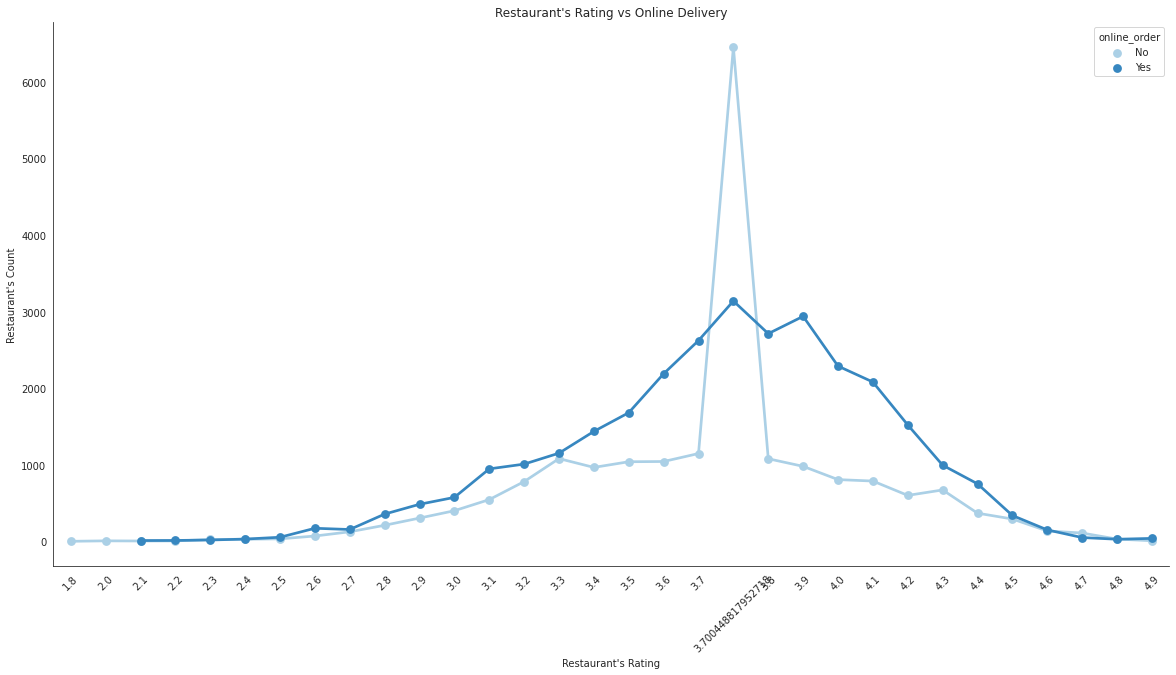

In [62]:
#EDA Step 5: Restaurant's Rating vs Online Delivery
plt.figure(figsize=(20, 10))
sns.set_style('white')

rating_data = data.groupby(['rate', 'online_order']).size().reset_index(name='count')


ax = sns.pointplot(x='rate', y='count', hue='online_order', data=rating_data, palette='Blues')

ax.set_title('Restaurant\'s Rating vs Online Delivery')
ax.set_xlabel('Restaurant\'s Rating')
ax.set_ylabel('Restaurant\'s Count')
sns.despine()
plt.xticks(rotation=45)
plt.show()

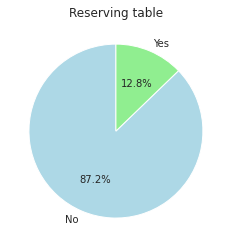

In [45]:
#EDA Step 6: Analysis of Book Table Distribution
column_counts = data['book_table'].value_counts()
labels = column_counts.index
sizes = column_counts.values
colors = ['lightblue', 'lightgreen']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Reserving table')
plt.show()

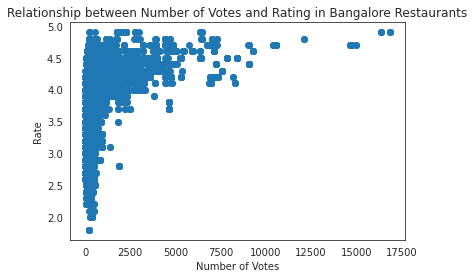

In [47]:
#EDA Step 7: Relationship between Number of Votes and Rating
plt.scatter(data['votes'], data['rate'])
# Add labels and a title to the plot
plt.xlabel('Number of Votes')
plt.ylabel('Rate')
plt.title('Relationship between Number of Votes and Rating in Bangalore Restaurants')
plt.show()

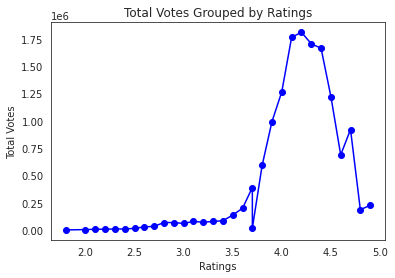

In [48]:
# EDA Step 8: Total Votes Grouped by Rating
votes_by_rating = data.groupby('rate')['votes'].sum()
plt.plot(votes_by_rating.index, votes_by_rating.values, 'bo-')
plt.xlabel('Ratings')
plt.ylabel('Total Votes')
plt.title('Total Votes Grouped by Ratings')
plt.show()

<ipython-input-49-264622382bc3>:4: FutureWarning:

The default value of regex will change from True to False in a future version.



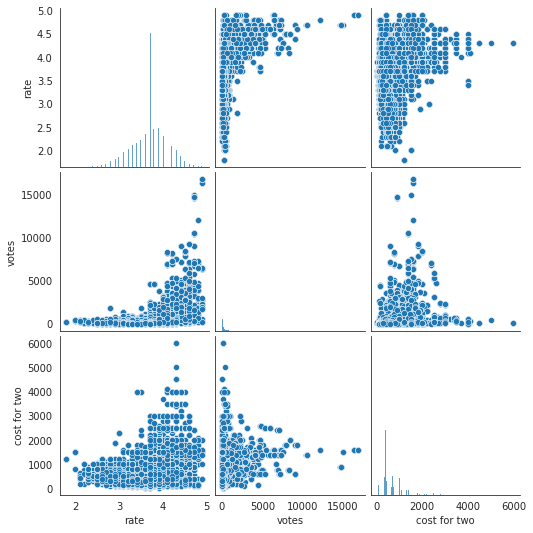

In [49]:
# EDA Step 9: Pair Plots
cols_to_use = ['rate', 'votes', 'cost for two']
data[cols_to_use] = data[cols_to_use].astype(str)
data[cols_to_use] = data[cols_to_use].apply(lambda x: pd.to_numeric(x.str.replace('[^\d.]', ''), errors='coerce'))
data.dropna(inplace=True)
sns.pairplot(data[cols_to_use])

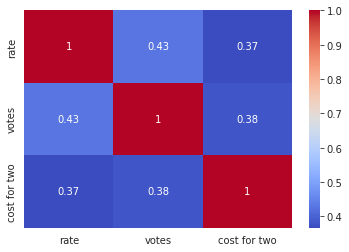

In [50]:
#EDA Step 9b: Heatmap
corr = data.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.show()

In [51]:
#EDA Step 10: Skewness
num_cols = data.select_dtypes(include=['int64', 'float64']).columns
skewness = data.skew()
print("Skewness values for numerical columns:")
print(skewness)

Skewness values for numerical columns:
rate           -0.365796
votes           7.513797
cost for two    2.595196
dtype: float64


<ipython-input-51-934313db6038>:3: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



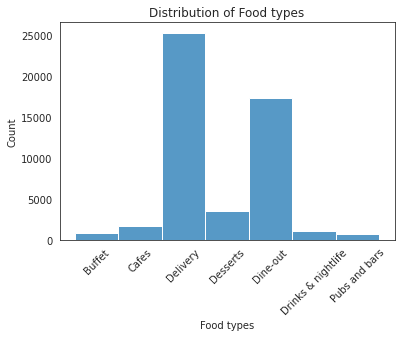

In [61]:
# EDA Step 11: Histogram plot for the distribution of food types
sns.histplot(data=data, x='food_type', bins=50, kde=False)

plt.title('Distribution of Food types')
plt.xlabel('Food types')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

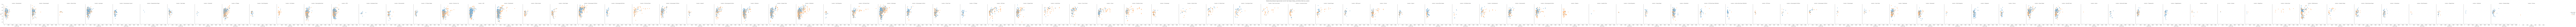

In [54]:
# EDA Step 12: Split plot for establishing the relationship between Approximate Cost for Two People, Rating, and Online Order by Location
sns.relplot(x='cost for two', y='rate', hue='online_order', col='location', data=data)
plt.subplots_adjust(top=0.85)
plt.suptitle('Relationship between Approximate Cost for Two People, Rating, and Online Order by Location')
plt.show()